In [2]:
import pandas as pd
import numpy as np
import datetime

## DATA PREPARATION

In [3]:
bookings = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/Booking_level_data.csv")

In [4]:
bookings.head()

,ACCOMMODATION_CODE,BOOKING_ID,BOOKING_STATUS,BOOKING_STATUS_DESCRIPTION,arrivaldate,departuredate,bookingdate,gbv,no_persons,no_child,no_adults
0,AT-5505-11,576245314,BOOKING,BOOKING,7/27/2019,8/3/2019,12/3/2018,2710.75,27,0,24
1,AT-5505-11,76234292,CANCELLED,CANCELLATION (NO PAYMENT),10/5/2019,10/12/2019,11/14/2018,0.00,19,10,9
2,AT-5505-11,1UHGKQGJ,BOOKING,BOOKING,10/5/2019,10/12/2019,8/21/2019,1839.04,23,12,11
3,AT-5505-11,776298327,CANCELLED,CANCELLATION WITHOUT INSURANCE,10/12/2019,10/19/2019,1/28/2019,567.00,24,17,7
4,AT-5541-33,76052288,BOOKING,BOOKING,3/2/2019,3/9/2019,3/7/2018,2288.59,19,6,11


In [5]:
bookings['arrivaldate'] = pd.to_datetime(bookings['arrivaldate'])
bookings['departuredate'] = pd.to_datetime(bookings['departuredate'])
bookings['bookingdate'] = pd.to_datetime(bookings['bookingdate'])

In [6]:
date_to_week = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/weeks_start_date.csv")

In [7]:
date_to_week

,YEAR,WEEK,WK_START
0,2017,20,2017-05-13
1,2017,21,2017-05-20
2,2017,22,2017-05-27
3,2017,23,2017-06-03
4,2017,24,2017-06-10
...,...,...,...
185,2020,49,2020-11-28
186,2020,50,2020-12-05
187,2020,51,2020-12-12
188,2020,52,2020-12-19


In [8]:
date_to_week['WK_START'] = pd.to_datetime(date_to_week['WK_START'])

In [9]:
date_to_week["WK_END"]= date_to_week["WK_START"] + datetime.timedelta(7)

In [10]:
date_to_week.head()

,YEAR,WEEK,WK_START,WK_END
0,2017,20,2017-05-13,2017-05-20
1,2017,21,2017-05-20,2017-05-27
2,2017,22,2017-05-27,2017-06-03
3,2017,23,2017-06-03,2017-06-10
4,2017,24,2017-06-10,2017-06-17


In [11]:
FR_bookings = bookings[(bookings["ACCOMMODATION_CODE"].str.contains("AT"))&(bookings["BOOKING_STATUS"]=="BOOKING")]

In [12]:
FR_bookings

,ACCOMMODATION_CODE,BOOKING_ID,BOOKING_STATUS,BOOKING_STATUS_DESCRIPTION,arrivaldate,departuredate,bookingdate,gbv,no_persons,no_child,no_adults
0,AT-5505-11,576245314,BOOKING,BOOKING,2019-07-27,2019-08-03,2018-12-03,2710.75,27,0,24
2,AT-5505-11,1UHGKQGJ,BOOKING,BOOKING,2019-10-05,2019-10-12,2019-08-21,1839.04,23,12,11
4,AT-5541-33,76052288,BOOKING,BOOKING,2019-03-02,2019-03-09,2018-03-07,2288.59,19,6,11
5,AT-5541-33,675987820,BOOKING,BOOKING,2018-12-29,2019-01-05,2018-01-03,4160.83,17,0,17
6,AT-5541-33,175999407,BOOKING,BOOKING,2019-02-16,2019-02-23,2018-01-12,3393.46,17,5,12
...,...,...,...,...,...,...,...,...,...,...,...
385734,AT-8785-03,276071066,BOOKING,BOOKING,2019-03-02,2019-03-09,2018-04-01,4195.41,20,6,12
385735,AT-8785-03,976090744,BOOKING,BOOKING,2018-09-06,2018-09-09,2018-04-30,813.04,20,0,20
385736,AT-8790-06,776012237,BOOKING,BOOKING,2018-02-26,2018-03-02,2018-01-22,1190.20,20,7,13
385834,AT-5710-132,876068657,BOOKING,BOOKING,2018-04-12,2018-04-15,2018-03-28,1526.12,20,0,20


In [12]:
# Create a day wise booking dataframe. Converts booking level data into day wise. 
day_wise_bookings = pd.DataFrame(columns=["ACCOMMODATION_CODE", "BOOKING_ID", "arrivaldate", "departuredate","bookingdate", "date", "revenue"])
count = 0
for booking in FR_bookings.values:
    if(count%10000==0):
        print(count)
    count+= 1
    days_of_booking = int(((booking[5]-booking[4]) / np.timedelta64(1, 'D')))
    rev_per_day = booking[7]/days_of_booking
    for i in range(days_of_booking):
        date = booking[4] + datetime.timedelta(i)
        booking_df = pd.DataFrame([(booking[0], booking[1], booking[4], booking[5], booking[6], date, rev_per_day)], columns=["ACCOMMODATION_CODE", "BOOKING_ID", "arrivaldate", "departuredate","bookingdate", "date", "revenue"])
        day_wise_bookings = day_wise_bookings.append(booking_df)

0
10000
20000
30000


In [13]:
day_wise_bookings = day_wise_bookings.reset_index().drop(["index"], axis=1)

In [388]:
day_wise_bookings[day_wise_bookings["ACCOMMODATION_CODE"]=="FR-00002-51"]

,ACCOMMODATION_CODE,BOOKING_ID,arrivaldate,departuredate,bookingdate,date,revenue
3236,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-03,190.021429
3237,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-04,190.021429
3238,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-05,190.021429
3239,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-06,190.021429
3240,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-07,190.021429
3241,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-08,190.021429
3242,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-09,190.021429


In [15]:
# Create day wise week dataframe. Converts week level dates to each date 
day_wise_week = pd.DataFrame(columns=["year", "week", "week_start", "week_end","date"])
count = 0
for week in date_to_week.values:
    if(count%365==0):
        print(count)
    days_of_booking = int(((week[3]-week[2]) / np.timedelta64(1, 'D')))
#     rev_per_day = booking[7]/days_of_booking
    for i in range(days_of_booking):
        count+= 1
        date = week[2] + datetime.timedelta(i)
        week_df = pd.DataFrame([(week[0], week[1], week[2], week[3], date)], columns=["year", "week", "week_start", "week_end","date"])
        day_wise_week = day_wise_week.append(week_df)

0


In [16]:
day_wise_week

,year,week,week_start,week_end,date
0,2017,20,2017-05-13,2017-05-20,2017-05-13
0,2017,20,2017-05-13,2017-05-20,2017-05-14
0,2017,20,2017-05-13,2017-05-20,2017-05-15
0,2017,20,2017-05-13,2017-05-20,2017-05-16
0,2017,20,2017-05-13,2017-05-20,2017-05-17
...,...,...,...,...,...
0,2020,53,2020-12-26,2021-01-02,2020-12-28
0,2020,53,2020-12-26,2021-01-02,2020-12-29
0,2020,53,2020-12-26,2021-01-02,2020-12-30
0,2020,53,2020-12-26,2021-01-02,2020-12-31


In [17]:
day_wise_week = day_wise_week.reset_index().drop(["index"], axis=1)

In [18]:
day_wise_week

,year,week,week_start,week_end,date
0,2017,20,2017-05-13,2017-05-20,2017-05-13
1,2017,20,2017-05-13,2017-05-20,2017-05-14
2,2017,20,2017-05-13,2017-05-20,2017-05-15
3,2017,20,2017-05-13,2017-05-20,2017-05-16
4,2017,20,2017-05-13,2017-05-20,2017-05-17
...,...,...,...,...,...
1325,2020,53,2020-12-26,2021-01-02,2020-12-28
1326,2020,53,2020-12-26,2021-01-02,2020-12-29
1327,2020,53,2020-12-26,2021-01-02,2020-12-30
1328,2020,53,2020-12-26,2021-01-02,2020-12-31


In [66]:
FR_day_wise_booking = pd.merge(day_wise_bookings, day_wise_week, on="date", how="left")

In [389]:
FR_day_wise_booking[FR_day_wise_booking["ACCOMMODATION_CODE"]=="FR-00002-51"]

,ACCOMMODATION_CODE,BOOKING_ID,arrivaldate,departuredate,bookingdate,date,revenue,year,week,week_start,week_end
3236,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-03,190.021429,2019,32,2019-08-03,2019-08-10
3237,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-04,190.021429,2019,32,2019-08-03,2019-08-10
3238,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-05,190.021429,2019,32,2019-08-03,2019-08-10
3239,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-06,190.021429,2019,32,2019-08-03,2019-08-10
3240,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-07,190.021429,2019,32,2019-08-03,2019-08-10
3241,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-08,190.021429,2019,32,2019-08-03,2019-08-10
3242,FR-00002-51,276288513,2019-08-03,2019-08-10,2019-01-20,2019-08-09,190.021429,2019,32,2019-08-03,2019-08-10


In [68]:
FR_weekly_revenue = FR_day_wise_booking.groupby(["year","week","ACCOMMODATION_CODE"]).sum()

In [69]:
FR_weekly_revenue = FR_weekly_revenue.reset_index()

In [391]:
FR_weekly_revenue[FR_weekly_revenue["ACCOMMODATION_CODE"]=="FR-00002-51"]

,year,week,ACCOMMODATION_CODE,revenue,no_days_booked,occupancy
32766,2019,32,FR-00002-51,1330.15,7,1.0


In [71]:
FR_occupancy = FR_day_wise_booking.groupby(["year","week","ACCOMMODATION_CODE"]).count()["date"]

In [72]:
FR_occupancy = FR_occupancy.reset_index()
FR_occupancy

,year,week,ACCOMMODATION_CODE,date
0,2018,3,FR-05100-51,7
1,2018,3,FR-05250-41-01,6
2,2018,3,FR-06420-17-01,4
3,2018,3,FR-06537-01,5
4,2018,3,FR-08240-01,1
...,...,...,...,...
44554,2020,2,FR-59132-13-01,2
44555,2020,2,FR-68140-03,1
44556,2020,2,FR-68910-01,7
44557,2020,2,FR-73570-01-01,7


In [73]:
FR_occupancy = FR_occupancy.rename(columns={"date":"no_days_booked"})

In [74]:
FR_occupancy["occupancy"] = FR_occupancy["no_days_booked"]/7

In [75]:
FR_occupancy.head()

,year,week,ACCOMMODATION_CODE,no_days_booked,occupancy
0,2018,3,FR-05100-51,7,1.000000
1,2018,3,FR-05250-41-01,6,0.857143
2,2018,3,FR-06420-17-01,4,0.571429
3,2018,3,FR-06537-01,5,0.714286
4,2018,3,FR-08240-01,1,0.142857


In [76]:
FR_weekly_revenue = FR_weekly_revenue.merge(FR_occupancy, on=["year", "week", "ACCOMMODATION_CODE"], how="left")

In [77]:
FR_weekly_revenue.head()

,year,week,ACCOMMODATION_CODE,revenue,no_days_booked,occupancy
0,2018,3,FR-05100-51,445.270,7,1.000000
1,2018,3,FR-05250-41-01,423.280,6,0.857143
2,2018,3,FR-06420-17-01,585.730,4,0.571429
3,2018,3,FR-06537-01,458.740,5,0.714286
4,2018,3,FR-08240-01,58.325,1,0.142857


In [78]:
avail_df = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/week_wise_availability.csv")

In [79]:
avail_df = avail_df.rename(columns={"accommodation_code": "ACCOMMODATION_CODE"})

In [80]:
FR_avail_df = avail_df[avail_df["ACCOMMODATION_CODE"].str.contains("FR")]

In [81]:
fr_df = pd.DataFrame(FR_avail_df.groupby(["ACCOMMODATION_CODE"]).count()["week"])

In [82]:
FR_avail_df.availablity_fin.mean()

0.2169232353851949

In [85]:
fr_df = fr_df.reset_index()
fr_df[fr_df["ACCOMMODATION_CODE"]=="FR-14400-20"]

,ACCOMMODATION_CODE,week
1285,FR-14400-20,156


In [86]:
FR_avail_df = pd.merge(FR_avail_df, FR_weekly_revenue, on=["year","week","ACCOMMODATION_CODE"], how="outer")

In [88]:
FR_avail_df = FR_avail_df.fillna(0.0)

In [89]:
FR_avail_df

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy
0,FR-00001-70,1,2019,1.00,0.000000,0.0,0.000000
1,FR-00009-65,1,2020,0.00,0.000000,0.0,0.000000
2,FR-00017-54,1,2018,0.44,0.000000,0.0,0.000000
3,FR-00018-59,1,2019,0.00,0.000000,0.0,0.000000
4,FR-00020-26,1,2020,0.00,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...
726203,FR-88120-22-02,1,2020,0.00,863.860000,7.0,1.000000
726204,FR-88240-02-01,1,2020,0.00,360.700000,7.0,1.000000
726205,FR-88560-04,1,2020,0.00,831.665000,7.0,1.000000
726206,FR-59132-13-01,2,2020,0.00,138.867143,2.0,0.285714


In [90]:
accommodation_df = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/X_data.csv")

In [91]:
FR_properties = accommodation_df[accommodation_df["COUNTRY"] == "FR"]

In [92]:
FR_properties = FR_properties.drop(["Unnamed: 0"], axis=1)

In [93]:
model_data = pd.merge(FR_avail_df, FR_properties, on="ACCOMMODATION_CODE", how="left")

In [94]:
# model_data = model_data[model_data["revenue"].notnull()]

In [95]:
model_data.head()

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,FR-00001-70,1,2019,1.00,0.0,0.0,0.0,3.0,Villa,12.0,...,NaN,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
1,FR-00009-65,1,2020,0.00,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FR-00017-54,1,2018,0.44,0.0,0.0,0.0,2.0,Holiday home,6.0,...,NaN,NaN,NaN,FR,182.672995,26.0,NaN,NaN,NaN,NaN
3,FR-00018-59,1,2019,0.00,0.0,0.0,0.0,2.0,Holiday home,4.0,...,NaN,NaN,NaN,FR,64.030340,7.0,NaN,NaN,NaN,NaN
4,FR-00020-26,1,2020,0.00,0.0,0.0,0.0,3.0,Villa,10.0,...,NaN,NaN,NaN,FR,298.799476,4.0,NaN,NaN,NaN,NaN


In [98]:
model_data.occupancy.mean(), model_data.availablity_fin.mean()

(0.05481192322703281, 0.21402398761782146)

In [99]:
model_data[(model_data["ACCOMMODATION_CODE"]=="FR-00001-70")&(model_data["revenue"].isnull())]

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020


In [100]:
model_data.to_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_weekly_revenue_dataset.csv")

In [101]:
data = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_weekly_revenue_dataset.csv")

In [102]:
data.head()

,Unnamed: 0,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,0,FR-00001-70,1,2019,1.00,0.0,0.0,0.0,3.0,Villa,...,NaN,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
1,1,FR-00009-65,1,2020,0.00,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,FR-00017-54,1,2018,0.44,0.0,0.0,0.0,2.0,Holiday home,...,NaN,NaN,NaN,FR,182.672995,26.0,NaN,NaN,NaN,NaN
3,3,FR-00018-59,1,2019,0.00,0.0,0.0,0.0,2.0,Holiday home,...,NaN,NaN,NaN,FR,64.030340,7.0,NaN,NaN,NaN,NaN
4,4,FR-00020-26,1,2020,0.00,0.0,0.0,0.0,3.0,Villa,...,NaN,NaN,NaN,FR,298.799476,4.0,NaN,NaN,NaN,NaN


## Data cleaning

In [117]:
corrupted_data = data[(data["availablity_fin"] == 0) & ((data["occupancy"] > 0) | (data["revenue"] > 0))]

In [118]:
corrupted_data = pd.concat([corrupted_data,data[(data["revenue"] > data["total2019"] + data["total2018"]) & (data["year"] < 2020)]], axis=0)

In [119]:
corrupted_data = pd.concat([corrupted_data, data[data["availablity_fin"].isnull()]], axis=0)

In [120]:
corrupted_data = pd.concat([corrupted_data, data[data["ACCOMMODATION_TYPE"].isnull()]], axis=0)

In [121]:
corrupted_data.to_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_corrupted_booking_data.csv")

In [122]:
corrupted_data.head()

,Unnamed: 0,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
20,20,FR-14400-20,1,2020,0.0,640.997143,6.0,0.857143,3.0,Villa,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
57,57,FR-68140-03,1,2020,0.0,678.355000,7.0,1.000000,2.0,Holiday home,...,NaN,NaN,NaN,FR,81.632287,21.0,NaN,NaN,NaN,NaN
62,62,FR-73350-74,1,2019,0.0,0.000000,7.0,1.000000,3.0,Chalet,...,NaN,NaN,NaN,FR,166.440238,6.0,NaN,NaN,NaN,NaN
147,147,FR-70280-02,1,2020,0.0,816.490000,7.0,1.000000,2.0,Holiday home,...,NaN,NaN,NaN,FR,114.501893,21.0,NaN,NaN,NaN,NaN
158,158,FR-76790-05,1,2020,0.0,789.810000,7.0,1.000000,2.0,Holiday home,...,NaN,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN


In [123]:
cleaned_data = data.drop(data.index[corrupted_data.index])

In [124]:
cleaned_data = cleaned_data.reset_index().drop(["Unnamed: 0","index"], axis=1)

In [127]:
cleaned_data.to_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_cleaned_weekly_data.csv")

## Model preparation

In [128]:
# from random import shuffle
from random import seed
seed(20)

In [129]:
from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [130]:
cleaned_data = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_cleaned_weekly_data.csv")

In [131]:
cleaned_data.columns

Index(['Unnamed: 0', 'ACCOMMODATION_CODE', 'week', 'year', 'availablity_fin',
       'revenue', 'no_days_booked', 'occupancy', 'ACCOMMODATION_TYPE',
       'ACCO_DESCRIPTION', 'NUMBER_OF_PERSONS', 'BEDROOM_COUNT',
       'BATHROOM_COUNT', 'HAS_WIFI', 'HAS_POOL', 'HAS_PRIVATE_POOL',
       'HAS_SHARED_POOL', 'HAS_INDOOR_POOL', 'HAS_OUTDOOR_POOL', 'IS_DETACHED',
       'HAS_SAUNA', 'HAS_JACUZZI', 'IS_SKIING', 'IS_ON_A_FARM', 'X2017.x',
       'X2018.x', 'X2019.x', 'X2017.y', 'X2018.y', 'X2019.y', 'total2019',
       'total2018', 'total2017', 'Total_HO', 'Total_BV', 'LATITUDE',
       'LONGITUDE', 'max', 'ELEVATION', 'if_near_coast', 'distance_from_coast',
       'nearest_coastal_longitude', 'nearest_coastal_latitude', 'COUNTRY',
       'price', 'bookings_count', 'weeks in 2017', 'weeks in 2018',
       'weeks in 2019', 'weeks in 2020'],
      dtype='object')

In [271]:
cleaned_data = cleaned_data.drop(cleaned_data.index[cleaned_data["availablity_fin"]==0])

In [326]:
cleaned_data.availablity_fin.mean(), cleaned_data.occupancy.mean()

(0.9415912045863877, 0.18892776655475216)

In [272]:
cleaned_data[cleaned_data["ACCOMMODATION_CODE"]=="FR-76790-05"]

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
5696,FR-76790-05,1,2018,0.143,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
8944,FR-76790-05,1,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
17790,FR-76790-05,2,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
24343,FR-76790-05,3,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
34445,FR-76790-05,4,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466506,FR-76790-05,50,2018,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
472975,FR-76790-05,51,2018,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
475208,FR-76790-05,51,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
486139,FR-76790-05,52,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN


In [273]:
cleaned_data["distance_from_coast"] = cleaned_data["distance_from_coast"].fillna(-999)

In [274]:
cleaned_data = cleaned_data.drop(["Unnamed: 0"], axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [275]:
cleaned_data = cleaned_data[cleaned_data["year"]<2020]

In [276]:
cleaned_data[cleaned_data["ACCOMMODATION_CODE"]=="FR-76790-05"]

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
5696,FR-76790-05,1,2018,0.143,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
8944,FR-76790-05,1,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
17790,FR-76790-05,2,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
24343,FR-76790-05,3,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
34445,FR-76790-05,4,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466506,FR-76790-05,50,2018,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
472975,FR-76790-05,51,2018,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
475208,FR-76790-05,51,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN
486139,FR-76790-05,52,2019,1.000,0.0,0.0,0.0,2,Holiday home,6,...,-999.0,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN


In [277]:
convert_dict = {'week': int, 
                'year': int,
                'ACCOMMODATION_TYPE': int,
                'NUMBER_OF_PERSONS': int,
                'BEDROOM_COUNT': int,
                'BATHROOM_COUNT': int,
                'HAS_WIFI': int,
                'HAS_POOL': int,
                'if_near_coast':int,
               } 

In [278]:
features = ["week","year","availablity_fin","ACCOMMODATION_TYPE","NUMBER_OF_PERSONS",'BEDROOM_COUNT', 'BATHROOM_COUNT', 'HAS_WIFI',
            'HAS_POOL', 'LATITUDE', 'LONGITUDE', 'ELEVATION','if_near_coast', 'distance_from_coast', 'price']

In [279]:
output = ["revenue", "occupancy"]

In [280]:
cleaned_data = cleaned_data.astype(convert_dict)

In [281]:
accommodations = cleaned_data["ACCOMMODATION_CODE"].unique()
accommodations

array(['FR-00001-70', 'FR-00017-54', 'FR-03122-03', ..., 'FR-24170-52',
       'FR-11200-22', 'FR-83440-124'], dtype=object)

In [282]:
index = np.random.rand(len(accommodations)) < 0.8
index

array([ True, False, False, ...,  True,  True,  True])

In [283]:
train_accommodation_codes = accommodations[index]
test_accommodation_codes = accommodations[~index]

In [284]:
set(train_accommodation_codes).intersection(test_accommodation_codes)

set()

In [285]:
len(test_accommodation_codes), len(train_accommodation_codes)

(609, 2281)

In [286]:
train = cleaned_data.merge(pd.DataFrame(set(train_accommodation_codes).intersection(cleaned_data["ACCOMMODATION_CODE"].tolist()), columns={"ACCOMMODATION_CODE"}), on=["ACCOMMODATION_CODE"], how="inner")

In [287]:
test = cleaned_data.merge(pd.DataFrame(set(test_accommodation_codes).intersection(cleaned_data["ACCOMMODATION_CODE"].tolist()), columns={"ACCOMMODATION_CODE"}), on =["ACCOMMODATION_CODE"], how="inner")

In [393]:
test[(test["ACCOMMODATION_CODE"]=="FR-00002-51") & (test["week"]==32)]

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev,predicted_occupancy,occupancy_error
17856,FR-00002-51,32,2018,1.0,0.00,0.0,0.0,1,Apartment,4,...,1.0,NaN,NaN,NaN,NaN,346.902898,346.902898,-1.000000,0.179226,0.179226
17857,FR-00002-51,32,2019,1.0,1330.15,7.0,1.0,1,Apartment,4,...,1.0,NaN,NaN,NaN,NaN,445.585404,-884.564596,0.334989,0.296514,-0.703486


In [288]:
train.head()

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,FR-00001-70,1,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
1,FR-00001-70,1,2018,0.286,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
2,FR-00001-70,2,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
3,FR-00001-70,3,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
4,FR-00001-70,4,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN


In [289]:
train_X, train_Y, test_X, test_Y = train[features], train[output], test[features], test[output]

In [290]:
test_X.head()

,week,year,availablity_fin,ACCOMMODATION_TYPE,NUMBER_OF_PERSONS,BEDROOM_COUNT,BATHROOM_COUNT,HAS_WIFI,HAS_POOL,LATITUDE,LONGITUDE,ELEVATION,if_near_coast,distance_from_coast,price
0,1,2018,0.440,2,6,4,4,1,1,42.988656,2.854071,141.0,0,-999.0,182.672995
1,1,2019,0.588,2,6,4,4,1,1,42.988656,2.854071,141.0,0,-999.0,182.672995
2,2,2018,0.650,2,6,4,4,1,1,42.988656,2.854071,141.0,0,-999.0,182.672995
3,2,2019,0.125,2,6,4,4,1,1,42.988656,2.854071,141.0,0,-999.0,182.672995
4,3,2018,1.000,2,6,4,4,1,1,42.988656,2.854071,141.0,0,-999.0,182.672995


In [291]:
categorical_features_indices = np.where(train_X.dtypes != np.float64)[0]

In [292]:
categorical_features_indices

array([ 0,  1,  3,  4,  5,  6,  7,  8, 12], dtype=int64)

In [396]:
float_features_indices = np.where(train_X.dtypes == np.float64)[0]
float_features_indices

array([ 2,  9, 10, 11, 13, 14], dtype=int64)

In [293]:
X_train, X_validation, y_train, y_validation = train_test_split(train_X, train_Y, train_size=0.8, random_state=42)

## REVENUE PER WEEK 

In [327]:
revenue_model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=1500,
    depth=10,
    random_seed=42,
    logging_level='Silent',
    learning_rate=0.01,
)

In [397]:
revenue_model.fit(
    X_train, y_train["revenue"],
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation["revenue"]),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

TypeError: fit() got an unexpected keyword argument 'float_features'

In [329]:
cv_params = revenue_model.get_params()
cv_data = cv(
    Pool(train_X, train_Y["revenue"], cat_features=categorical_features_indices,),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [330]:
print('Best validation RMSE score: {:.2f}±{:.2f} on step {}'.format(
    np.min(cv_data['test-RMSE-mean']),
    cv_data['test-RMSE-std'][np.argmin(cv_data['test-RMSE-mean'])],
    np.argmin(cv_data['test-RMSE-mean'])
))

Best validation RMSE score: 449.22±9.16 on step 1499


C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [331]:
print('Precise validation RMSE score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

Precise validation RMSE score: 449.2161588229733


In [332]:
predictions_revenue = revenue_model.predict(test_X)

In [333]:
test["predicted_revenue"] = predictions_revenue

In [334]:
test["revenue_error"] = test["predicted_revenue"]-test["revenue"]

In [335]:
rev_ratio = np.array([])

In [336]:
for i, ele in enumerate(predictions_revenue):
    if test["revenue"].values[i] != 0:
        rev_ratio = np.append(rev_ratio, ele/test["revenue"].values[i])
    else:
        rev_ratio = np.append(rev_ratio, -1)

In [337]:
test["predicted_rev/weekly_rev"] = rev_ratio

In [347]:
revenue = test.groupby(["year", "ACCOMMODATION_CODE"]).sum()

In [351]:
revenue = revenue.reset_index()

In [382]:
revenue[revenue["revenue"]==0]

,index,year,ACCOMMODATION_CODE,week,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,NUMBER_OF_PERSONS,...,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev,predicted_occupancy,occupancy_error
4,4,2018,FR-00001-621,854,27.143,0.0,0.0,0.0,84,168,...,0.0,0.0,0.0,0.0,0.0,304.381739,304.381739,-28.0,0.385218,0.385218
5,5,2018,FR-00002-51,1378,52.000,0.0,0.0,0.0,52,208,...,52.0,0.0,0.0,0.0,0.0,5014.267553,5014.267553,-52.0,2.800178,2.800178
9,9,2018,FR-00004-101,793,25.143,0.0,0.0,0.0,52,234,...,0.0,0.0,0.0,0.0,0.0,-645.663211,-645.663211,-26.0,-0.601595,-0.601595
17,17,2018,FR-00006-40,899,29.520,0.0,0.0,0.0,93,372,...,217.0,0.0,0.0,0.0,0.0,11663.397313,11663.397313,-31.0,5.050179,5.050179
25,25,2018,FR-00009-16,159,6.000,0.0,0.0,0.0,18,60,...,6.0,0.0,0.0,0.0,0.0,-37.950637,-37.950637,-6.0,0.073430,0.073430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1055,2019,FR-84220-44,1326,50.857,0.0,0.0,0.0,153,510,...,204.0,0.0,0.0,0.0,0.0,20396.158329,20396.158329,-51.0,8.015868,8.015868
1067,1067,2019,FR-84600-04,990,43.857,0.0,0.0,0.0,88,264,...,0.0,0.0,0.0,0.0,0.0,-48.833554,-48.833554,-44.0,-1.339130,-1.339130
1068,1068,2019,FR-84600-06,810,35.000,0.0,0.0,0.0,108,288,...,0.0,0.0,0.0,0.0,0.0,-521.858238,-521.858238,-36.0,-0.267601,-0.267601
1076,1076,2019,FR-87400-03,36,8.000,0.0,0.0,0.0,16,16,...,40.0,0.0,0.0,0.0,0.0,-58.129613,-58.129613,-8.0,0.272733,0.272733


In [376]:
annual_revenue_error = np.array([])
for i, ele in enumerate(revenue["predicted_revenue"].values):
    if revenue["revenue"].values[i] != 0:
        annual_revenue_error = np.append(annual_revenue_error, ele/revenue["revenue"].values[i])
    else:
        annual_revenue_error = np.append(annual_revenue_error, -1)

In [377]:
annual_revenue_error.mean(), annual_revenue_error.std()

(1.000455122950563, 2.0449122133157966)

In [380]:
len(annual_revenue_error)

1087

(0, 100)

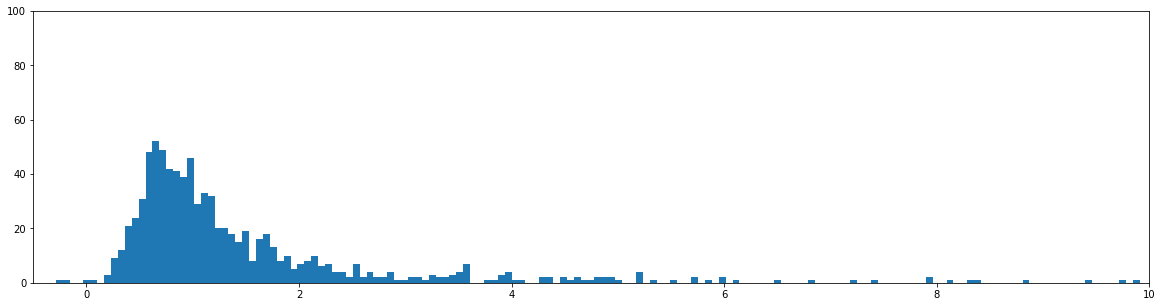

In [387]:
plt.figure(figsize=(20,5))
plt.hist(annual_revenue_error, bins=500)
plt.xlim(-0.5,10)
plt.ylim(0,100)

In [338]:
train

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,FR-00001-70,1,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
1,FR-00001-70,1,2018,0.286,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
2,FR-00001-70,2,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
3,FR-00001-70,3,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
4,FR-00001-70,4,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126928,FR-11200-22,51,2019,1.000,0.0,0.0,0.0,3,Villa,8,...,-999.0,NaN,NaN,FR,NaN,NaN,NaN,NaN,NaN,NaN
126929,FR-11200-22,52,2019,1.000,0.0,0.0,0.0,3,Villa,8,...,-999.0,NaN,NaN,FR,NaN,NaN,NaN,NaN,NaN,NaN
126930,FR-83440-124,50,2019,0.286,0.0,0.0,0.0,2,Holiday home,4,...,-999.0,NaN,NaN,FR,NaN,NaN,NaN,NaN,NaN,NaN
126931,FR-83440-124,51,2019,1.000,0.0,0.0,0.0,2,Holiday home,4,...,-999.0,NaN,NaN,FR,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'pred/revenue_per_week')

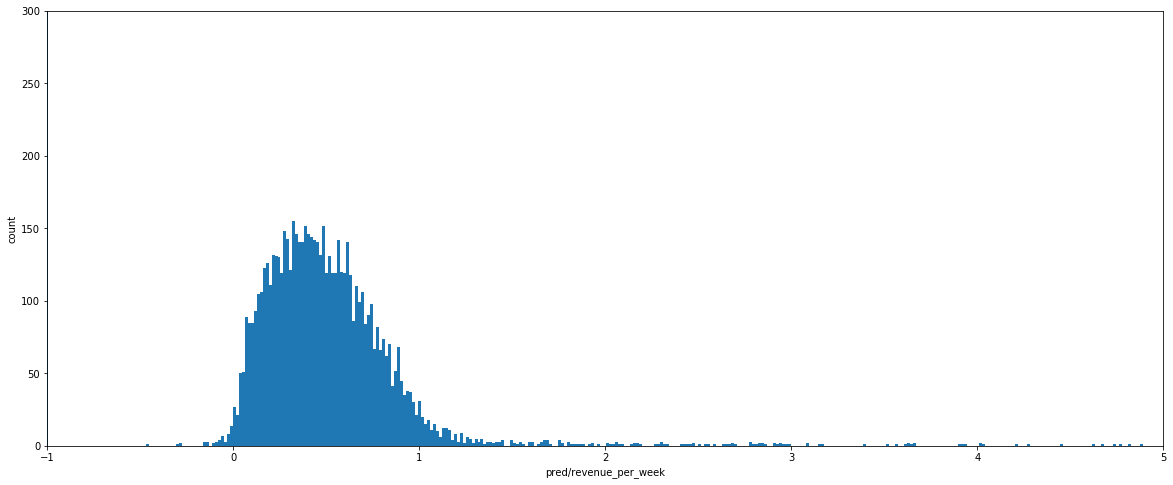

In [339]:
plt.figure(figsize=(20,8))
plt.hist(rev_ratio, bins=1000)
plt.xlim(-1,5)
plt.ylim(0,300)
plt.ylabel("count")
plt.xlabel("pred/revenue_per_week")

Text(0.5, 0, 'revenue error')

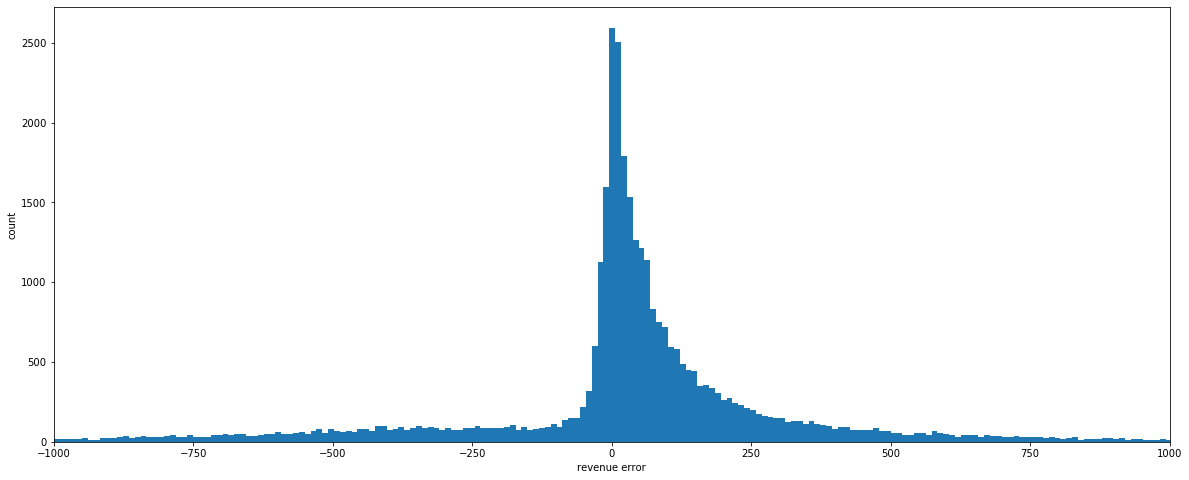

In [344]:
plt.figure(figsize=(20,8))
plt.hist(test["revenue_error"], bins=1000)
plt.xlim(-1000,1000)
plt.ylabel("count")
plt.xlabel("revenue error")

In [341]:
feature_importance_df_revenue = pd.DataFrame(tuple(zip(test_X.columns,revenue_model.feature_importances_)), columns={"importance", "features"})

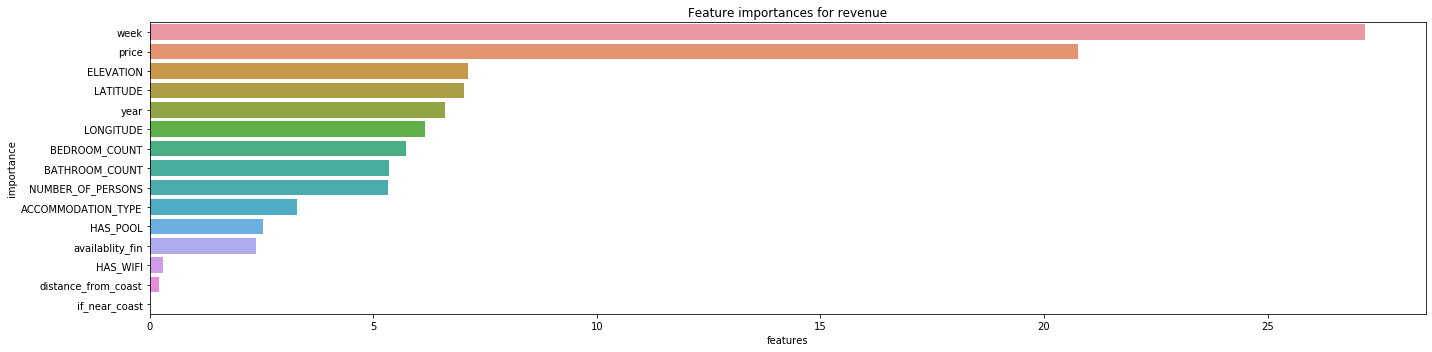

In [342]:
# feature_importance_df_revenue.sort_values(by="features")
plt.figure(figsize=(20,5))
sns.barplot(y="importance",
            x="features",
            data=feature_importance_df_revenue.sort_values(by="features",
                                           ascending=False))
plt.title('Feature importances for revenue')
plt.tight_layout()

## OCCUPANCY PER WEEK

In [345]:
occupancy_model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=1500,
    depth=10,
    random_seed=42,
    logging_level='Silent'
)

In [346]:
occupancy_model.fit(
    X_train, y_train["occupancy"],
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation["occupancy"]),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [328]:
cv_occ_params = occupancy_model.get_params()
cv_data = cv(
    Pool(train_X, train_Y["occupancy"], cat_features=categorical_features_indices),
    cv_occ_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [329]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.min(cv_data['test-RMSE-mean']),
    cv_data['test-RMSE-std'][np.argmin(cv_data['test-RMSE-mean'])],
    np.argmax(cv_data['test-RMSE-mean'])
))

Best validation accuracy score: 0.29±0.00 on step 0


C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)
C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [330]:
print('Precise validation accuracy score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

Precise validation accuracy score: 0.28572073283269506


In [309]:
occupancy_predictions = occupancy_model.predict(test_X)

In [310]:
occupancy_predictions.mean()

0.18554927863939236

In [311]:
test["predicted_occupancy"] = occupancy_predictions

In [312]:
test["occupancy_error"] = test["predicted_occupancy"]-test_Y["occupancy"]

In [313]:
occupancy_ratio = np.array([])

In [314]:
for i, ele in enumerate(occupancy_predictions):
    if test["occupancy"].values[i] != 0:
        occupancy_ratio = np.append(occupancy_ratio, ele/test_Y["occupancy"].values[i])
    else:
        occupancy_ratio = np.append(occupancy_ratio, -1)

In [315]:
len(occupancy_ratio)

34583

Text(0.5, 0, 'pred_occupancy/occupancy_per_week')

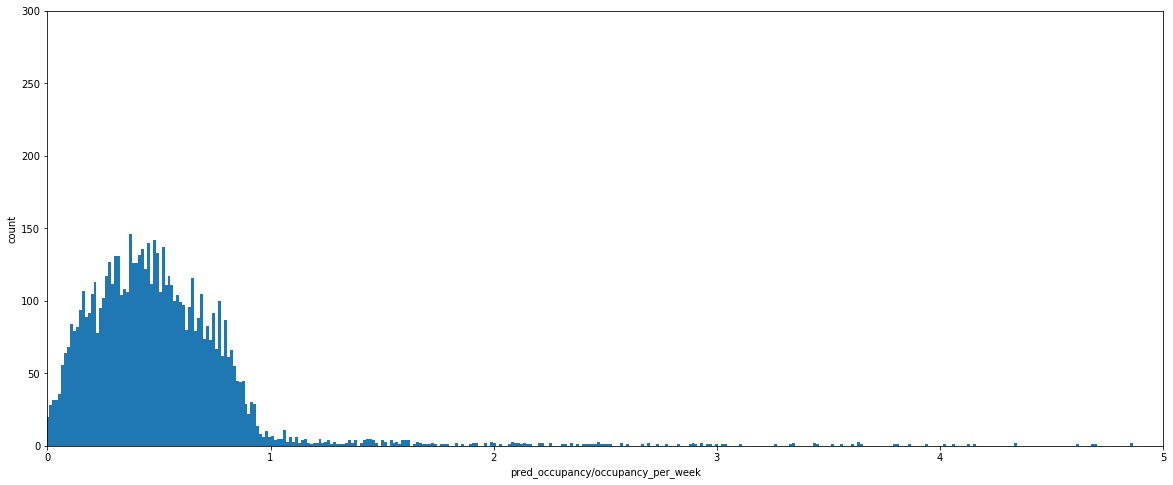

In [316]:
plt.figure(figsize=(20,8))
plt.hist(occupancy_ratio, bins=500)
plt.xlim(0,5)
plt.ylim(0,300)
plt.ylabel("count")
plt.xlabel("pred_occupancy/occupancy_per_week")

In [317]:
feature_importance_df_occupancy = pd.DataFrame(tuple(zip(test_X.columns,occupancy_model.feature_importances_)), columns={"importance", "features"})

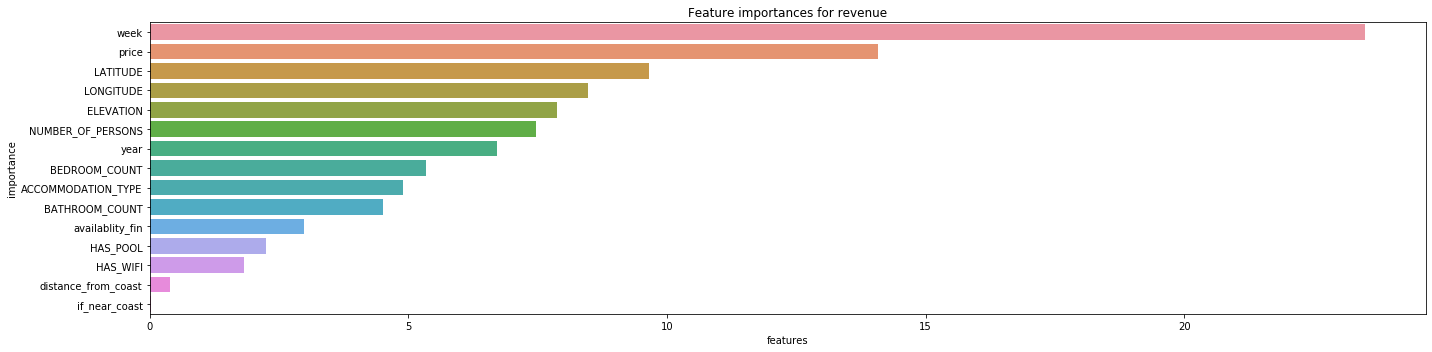

In [318]:
# feature_importance_df_revenue.sort_values(by="features")
plt.figure(figsize=(20,5))
sns.barplot(y="importance",
            x="features",
            data=feature_importance_df_occupancy.sort_values(by="features",
                                           ascending=False))
plt.title('Feature importances for revenue')
plt.tight_layout()

In [319]:
test

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev,predicted_occupancy,occupancy_error
0,FR-00017-54,1,2018,0.440,0.000000,0.0,0.000000,2,Holiday home,6,...,26.0,NaN,NaN,NaN,NaN,-24.863737,-24.863737,-1.000000,-0.030734,-0.030734
1,FR-00017-54,1,2019,0.588,0.000000,0.0,0.000000,2,Holiday home,6,...,26.0,NaN,NaN,NaN,NaN,-26.177529,-26.177529,-1.000000,-0.024624,-0.024624
2,FR-00017-54,2,2018,0.650,0.000000,0.0,0.000000,2,Holiday home,6,...,26.0,NaN,NaN,NaN,NaN,-6.840440,-6.840440,-1.000000,-0.018710,-0.018710
3,FR-00017-54,2,2019,0.125,0.000000,0.0,0.000000,2,Holiday home,6,...,26.0,NaN,NaN,NaN,NaN,-42.198671,-42.198671,-1.000000,-0.064366,-0.064366
4,FR-00017-54,3,2018,1.000,0.000000,0.0,0.000000,2,Holiday home,6,...,26.0,NaN,NaN,NaN,NaN,1.408051,1.408051,-1.000000,-0.013472,-0.013472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34578,FR-50840-02,48,2019,1.000,235.623333,4.0,0.571429,2,Holiday home,4,...,16.0,NaN,NaN,NaN,NaN,83.600167,-152.023166,0.354804,0.301508,-0.269921
34579,FR-50840-02,49,2019,1.000,164.926667,2.0,0.285714,2,Holiday home,4,...,16.0,NaN,NaN,NaN,NaN,84.164565,-80.762102,0.510315,0.304523,0.018809
34580,FR-50840-02,50,2019,1.000,204.860000,3.0,0.428571,2,Holiday home,4,...,16.0,NaN,NaN,NaN,NaN,84.845903,-120.014097,0.414165,0.303901,-0.124670
34581,FR-50840-02,51,2019,1.000,0.000000,0.0,0.000000,2,Holiday home,4,...,16.0,NaN,NaN,NaN,NaN,84.164565,84.164565,-1.000000,0.298374,0.298374


In [1]:
week_wise_revenue = test.groupby(["week"]).sum()

NameError: name 'test' is not defined

In [321]:
week_wise_revenue

,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,NUMBER_OF_PERSONS,BEDROOM_COUNT,BATHROOM_COUNT,HAS_WIFI,...,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev,predicted_occupancy,occupancy_error
week,,,,,,,,,,,,,,,,,,,,,
1,2018.503984,0.888386,73.281541,0.376494,0.053785,2.328685,7.354582,4.356574,2.635458,0.856574,...,11.523697,NaN,NaN,NaN,NaN,88.869673,15.588132,-0.923445,0.071695,0.017910
2,2018.504892,0.890802,3.414344,0.027397,0.003914,2.326810,7.342466,4.297456,2.600783,0.839530,...,11.193853,NaN,NaN,NaN,NaN,16.872575,13.458230,-0.995104,0.018351,0.014437
3,2018.502959,0.914649,10.391196,0.074951,0.010707,2.329389,7.518738,4.422091,2.676529,0.852071,...,11.133017,NaN,NaN,NaN,NaN,17.913363,7.522167,-0.985651,0.018820,0.008112
4,2018.512195,0.935018,21.272876,0.115854,0.016551,2.347561,7.518293,4.428862,2.668699,0.857724,...,11.380145,NaN,NaN,NaN,NaN,24.562247,3.289370,-0.975023,0.022781,0.006230
5,2018.509202,0.945820,26.902779,0.149284,0.021326,2.353783,7.486708,4.417178,2.670757,0.860941,...,11.368039,NaN,NaN,NaN,NaN,25.284202,-1.618577,-0.969667,0.024171,0.002844
6,2018.497959,0.944214,18.840397,0.087755,0.012536,2.353061,7.530612,4.438776,2.677551,0.861224,...,11.392771,NaN,NaN,NaN,NaN,26.105080,7.264683,-0.975053,0.024477,0.011940
7,2018.509395,0.958432,32.105710,0.158664,0.022666,2.346555,7.486430,4.442589,2.663883,0.872651,...,11.596059,NaN,NaN,NaN,NaN,39.344439,7.238729,-0.966320,0.031383,0.008716
8,2018.500000,0.951364,58.905413,0.258264,0.036895,2.340909,7.495868,4.421488,2.665289,0.876033,...,11.635697,NaN,NaN,NaN,NaN,49.251401,-9.654012,-0.941663,0.033785,-0.003110
9,2018.490909,0.940479,35.971569,0.236364,0.033766,2.345455,7.456566,4.434343,2.676768,0.878788,...,11.890215,NaN,NaN,NaN,NaN,38.749905,2.778336,-0.948759,0.030769,-0.002997


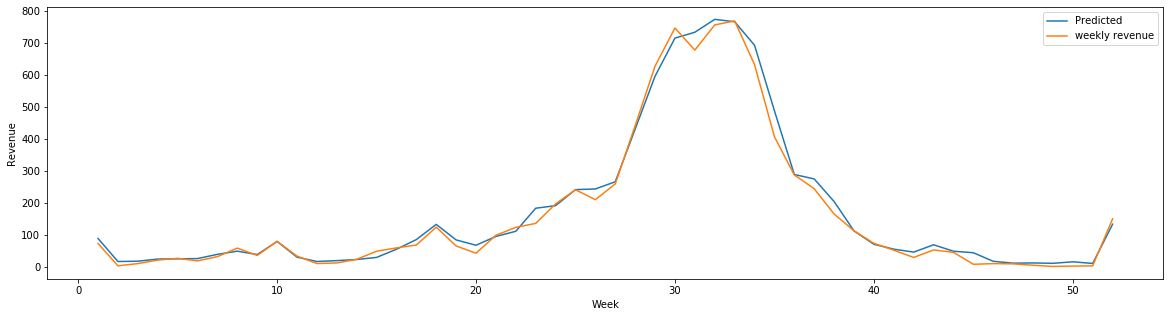

In [322]:
plt.figure(figsize=(20,5))
plt.plot(week_wise_revenue.index, week_wise_revenue.predicted_revenue, label="Predicted")
plt.plot(week_wise_revenue.index, week_wise_revenue.revenue, label="weekly revenue")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.legend()
plt.show()

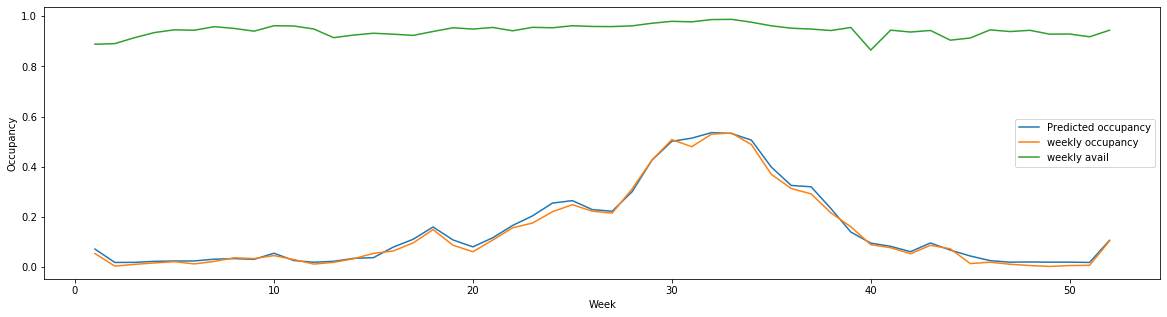

In [323]:
plt.figure(figsize=(20,5))
plt.plot(week_wise_revenue.index, week_wise_revenue.predicted_occupancy, label="Predicted occupancy")
plt.plot(week_wise_revenue.index, week_wise_revenue.occupancy, label="weekly occupancy")
plt.plot(week_wise_revenue.index, week_wise_revenue.availablity_fin, label="weekly avail")
plt.xlabel("Week")
plt.ylabel("Occupancy")
plt.legend()
plt.show()

In [65]:
props = pd.DataFrame([(i,2019,1,2,3,1,1,1,0,47.9035,8.362312,841.0,0,-999,34.53)for i in range(1,53)], columns=features)
# prop = pd.DataFrame([(2,2019,1,2,3,1,1,1,0,47.9035,8.362312,841.0,0,-999,34.53)], columns=features)

In [67]:
x = revenue_model.predict(props)

In [68]:
x

array([331.03932149, 191.66230296, 184.75837562, 196.51321977,
       190.20301959, 258.95777836, 270.69266906, 273.68909022,
       289.40288977, 248.53328296, 191.60180403, 188.9119973 ,
       202.19711339, 207.05313982, 212.05756247, 210.9480687 ,
       231.12280299, 267.02386106, 215.81443922, 217.98542539,
       230.1177668 , 262.17489042, 246.72303638, 269.15518918,
       289.87421469, 289.66242131, 313.71073556, 344.79509   ,
       376.01964138, 378.95445577, 378.73443324, 374.68412178,
       375.24851695, 365.4229002 , 334.39242783, 301.65061075,
       238.66583154, 245.90469087, 235.85884361, 242.79383204,
       241.09980555, 263.56463503, 257.85245507, 217.10682501,
       189.25505975, 193.99826309, 192.20379038, 188.12132343,
       183.387469  , 184.06430691, 168.8465007 , 274.62992956])

In [324]:
import math
math.sqrt((test["occupancy_error"]**2).mean())

0.3137237261957394

In [325]:
train[train["occupancy"]==0]

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,FR-00001-70,1,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
1,FR-00001-70,1,2018,0.286,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
2,FR-00001-70,2,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
3,FR-00001-70,3,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
4,FR-00001-70,4,2019,1.000,0.0,0.0,0.0,3,Villa,12,...,-999.0,NaN,NaN,FR,944.086429,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126928,FR-11200-22,51,2019,1.000,0.0,0.0,0.0,3,Villa,8,...,-999.0,NaN,NaN,FR,NaN,NaN,NaN,NaN,NaN,NaN
126929,FR-11200-22,52,2019,1.000,0.0,0.0,0.0,3,Villa,8,...,-999.0,NaN,NaN,FR,NaN,NaN,NaN,NaN,NaN,NaN
126930,FR-83440-124,50,2019,0.286,0.0,0.0,0.0,2,Holiday home,4,...,-999.0,NaN,NaN,FR,NaN,NaN,NaN,NaN,NaN,NaN
126931,FR-83440-124,51,2019,1.000,0.0,0.0,0.0,2,Holiday home,4,...,-999.0,NaN,NaN,FR,NaN,NaN,NaN,NaN,NaN,NaN
